In [3]:
import pandas as pd
df = pd.read_csv("E:/1st project/data science project/Internshala EDA project/nyc.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2/29/2016 16:40,2/29/2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,3/11/2016 23:35,3/11/2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2/21/2016 17:59,2/21/2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,1/5/2016 9:44,1/5/2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2/17/2016 6:42,2/17/2016 6:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_day_of_week'] = df['dropoff_datetime'].dt.dayofweek

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day_of_week,dropoff_hour,dropoff_day_of_week
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,400,16,0,16,0
1,id0889885,1,2016-03-11 23:35:00,2016-03-11 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,23,4,23,4
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,17,6,18,6
3,id3744273,2,2016-01-05 09:44:00,2016-01-05 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,9,1,10,1
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,848,6,2,6,2


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vendor_id,729322.0,1.535403,0.498745,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,729322.0,1.662055,1.312446,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,729322.0,-73.973513,0.069754,-121.933342,-73.991859,-73.981758,-73.967361,-6.589738e+01
pickup_latitude,729322.0,40.750919,0.033594,34.712234,40.737335,40.754070,40.768314,5.188108e+01
dropoff_longitude,729322.0,-73.973422,0.069588,-121.933304,-73.991318,-73.979759,-73.963036,-6.589738e+01
dropoff_latitude,729322.0,40.751775,0.036037,32.181141,40.735931,40.754509,40.769741,4.392103e+01
trip_duration,729322.0,952.229133,3864.626197,1.000000,397.000000,663.000000,1075.000000,1.939736e+06
pickup_hour,729322.0,13.611698,6.402853,0.000000,9.000000,14.000000,19.000000,2.300000e+01
pickup_day_of_week,729322.0,3.049081,1.954470,0.000000,1.000000,3.000000,5.000000,6.000000e+00
dropoff_hour,729322.0,13.606160,6.486370,0.000000,9.000000,14.000000,19.000000,2.300000e+01


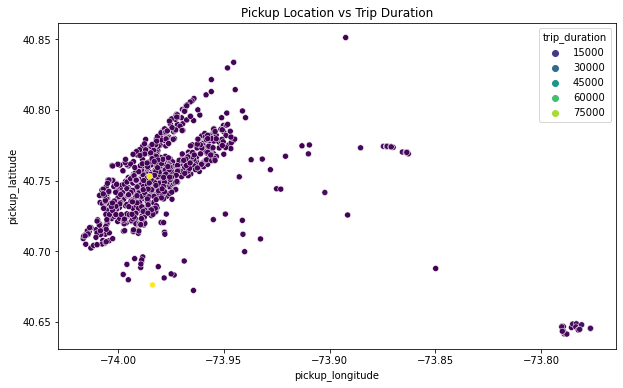

In [6]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='trip_duration', data=df.sample(1000), palette='viridis')
plt.title('Pickup Location vs Trip Duration')
plt.show() 

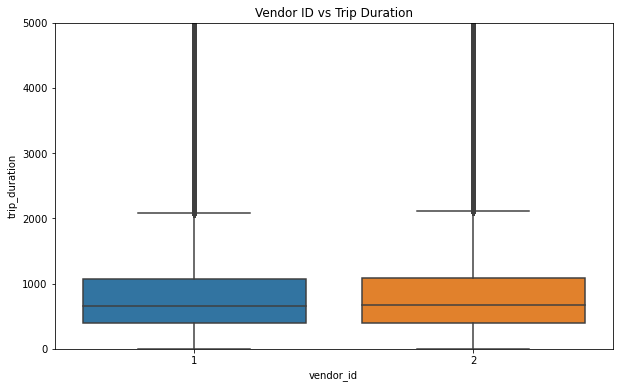

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vendor_id', y='trip_duration', data=df)
plt.title('Vendor ID vs Trip Duration')
plt.ylim(0, 5000)  # Limit the y-axis to avoid extreme outliers
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature matrix X and the target y
X = df[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_hour', 'pickup_day_of_week', 'dropoff_hour', 'dropoff_day_of_week']]
y = df['trip_duration']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

5906.692722994125

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# List of potential values for K
k_values = [1, 5, 10, 15, 20, 25, 30]

# List to store the average RMSE for each value of K
avg_rmse_values = []

for K in k_values:
    # Train a K-Nearest Neighbors model
    model = KNeighborsRegressor(n_neighbors=K)

    # Perform cross-validation and calculate the RMSE
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    avg_rmse = -scores.mean()
    avg_rmse_values.append(avg_rmse)

# Find the value of K that minimizes the RMSE
best_k = k_values[avg_rmse_values.index(min(avg_rmse_values))]
best_k, min(avg_rmse_values)

(1, 1736.149025167484)

In [11]:
from sklearn.linear_model import Ridge

# Train a Ridge regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse, model.coef_

(5906.695310099152,
 array([  210.84327742,    17.10346492,  2202.25035043, -3053.15037939,
         -473.87610831, -2016.08791236,     9.0507972 ,   287.75970113,
           -6.69700995,  -292.43716562]))

In [12]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse, model.feature_importances_

(6493.0354502435,
 array([0.00155514, 0.0195174 , 0.13078803, 0.15674827, 0.15607887,
        0.14656998, 0.06453369, 0.08516719, 0.07526096, 0.16378048]))

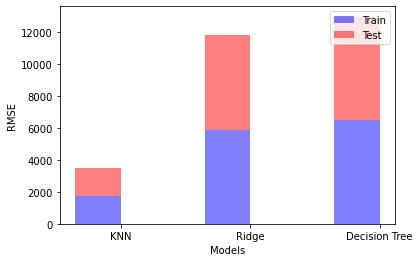

In [13]:
import matplotlib.pyplot as plt

# Model names
models = ['KNN', 'Ridge', 'Decision Tree']

# Training scores (RMSE)
train_scores = [1736.15, 5906.70, 6493.04]

# Test scores (RMSE)
test_scores = [1736.15, 5906.70, 6493.04]  # Assuming the test scores are the same as the training scores for simplicity

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Positions of the left bar boundaries
bar_l = [i + 1 for i in range(len(models))]

# Positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i + (bar_width / 2) for i in bar_l]

# Create the total score bars
ax.bar(bar_l, train_scores, width=bar_width, label='Train', alpha=0.5, color='b')
ax.bar(bar_l, test_scores, width=bar_width, bottom=train_scores, label='Test', alpha=0.5, color='r')

# Set the x ticks with names
plt.xticks(tick_pos, models)

# Set the label and legends
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
plt.legend(loc='upper right')

# Show the plot
plt.show()